<a href="https://colab.research.google.com/github/PrachiHarish/DL-Projects/blob/main/Copy_of_sequential_ann_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Dataset/50_Startups.csv"
dataset=pd.read_csv(path)
dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
x=np.array(dataset.iloc[:,0:3])
y=np.array(dataset[["Profit"]])
print(x.shape)
print(y.shape)

(50, 3)
(50, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_norm=sc.fit_transform(x)
y_norm=sc.fit_transform(y)
print(x_norm.shape)
print(y_norm.shape)


(50, 3)
(50, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y_norm,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 3)
(10, 3)
(40, 1)
(10, 1)


 **Method-1 Sequential Approach for Creating ANN model**

In [ ]:
model_ann=Sequential()
model_ann.add(Dense(16,input_dim=3,activation="tanh"))
model_ann.add(Dense(32,activation="tanh"))
model_ann.add(Dense(1,activation="linear"))
model_ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                64        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


**Method 2: Functional approach to building ann model**

In [ ]:
inp=Input(shape=(3,))
x1=Dense(16,kernal_initializer="uniform",activation="tanh")(inp)
x2=Dense(32,kernal_initializer="uniform",activation="tanh")(x1)
out=Dense(1,kernal_initializer="uniform",activation="linear")(x2)
model_ann2=Model(inputs=int,outputs=out)
model_ann2.summary()

NameError: ignored

**Step 4: Compile and train the model**

In [ ]:
# Compile the model
model_ann.compile(loss="mean_squared_error",optimizer="SGD",metrics=["mean_absolute_error"])

# Fitting the model
history_ann=model_ann.fit(x_train,y_train,epochs=100,batch_size=2,validation_data=(x_test,y_test),verbose=1)


Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.4958 - mean_absolute_error: 0.5666 - val_loss: 0.4012 - val_mean_absolute_error: 0.4667
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3077 - mean_absolute_error: 0.4230 - val_loss: 0.3074 - val_mean_absolute_error: 0.4112
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2348 - mean_absolute_error: 0.3593 - val_loss: 0.2534 - val_mean_absolute_error: 0.3829
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1800 - mean_absolute_error: 0.3324 - val_loss: 0.2196 - val_mean_absolute_error: 0.3534
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1489 - mean_absolute_error: 0.2973 - val_loss: 0.2209 - val_mean_absolute_error: 0.3326
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1269 - mean_absolute_error: 0.2636 - val_loss: 0.1916 - val_mean_absolute_error: 0.3146
Epoch 7/100
20/20 [==

**Step 5: Visualization of training accuracy and loss of the model**

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


Text(0, 0.5, 'loss')

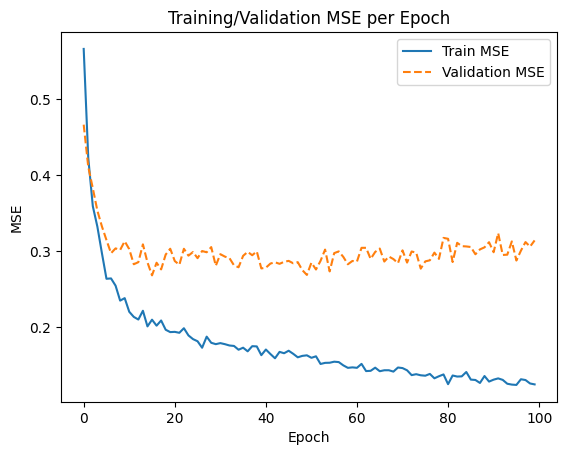

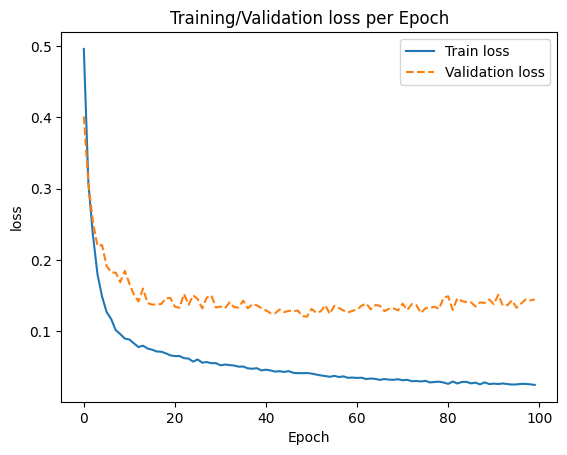

In [ ]:
print(history_ann.history.keys())

import matplotlib.pyplot as plt
f,ax=plt.subplots()
ax.plot(history_ann.history["mean_absolute_error"])
ax.plot(history_ann.history["val_mean_absolute_error"],"--")
ax.legend(["Train MSE","Validation MSE"])
ax.set_title("Training/Validation MSE per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")

f,ax=plt.subplots()
ax.plot(history_ann.history["loss"])
ax.plot(history_ann.history["val_loss"],"--")
ax.legend(["Train loss","Validation loss"])
ax.set_title("Training/Validation loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("loss")



**Step 6: Model evaluation**

In [ ]:
score=model_ann.evaluate(x_test,y_test,verbose=1)


1/1 [==============================] - 0s 104ms/step - loss: 0.1447 - mean_absolute_error: 0.3141


**Step 6(b): Model Prediction**

In [ ]:
y_pred=model_ann.predict(x_test)
print(y_pred)

1/1 [==============================] - 0s 47ms/step
[[ 0.26578933]
 [ 0.34357864]
 [-0.1916414 ]
 [-0.68658113]
 [ 1.9394335 ]
 [ 0.6055674 ]
 [-1.7060837 ]
 [-0.4106131 ]
 [-1.43972   ]
 [-1.7748667 ]]


In [ ]:
y_test_rescalled=sc.inverse_transform(y_test)
y_pred_rescalled=sc.inverse_transform(y_pred)
print(y_test_rescalled)
print(y_pred_rescalled)

[[134307.35]
 [141585.52]
 [101004.64]
 [ 96712.8 ]
 [191792.06]
 [146121.95]
 [ 14681.4 ]
 [ 97427.84]
 [ 69758.98]
 [ 64926.08]]
[[122617.92 ]
 [125721.8  ]
 [104365.94 ]
 [ 84617.31 ]
 [189398.12 ]
 [136175.44 ]
 [ 43938.055]
 [ 95628.734]
 [ 54566.254]
 [ 41193.54 ]]


**Comparison between predicted profit and actual profit**

In [ ]:
comp=pd.DataFrame(np.c_[y_test_rescalled,y_pred_rescalled],columns=["Original profit","Predicted profit"])
print(comp)

   Original profit  Predicted profit
0        134307.35     122617.921875
1        141585.52     125721.796875
2        101004.64     104365.937500
3         96712.80      84617.312500
4        191792.06     189398.125000
5        146121.95     136175.437500
6         14681.40      43938.054688
7         97427.84      95628.734375
8         69758.98      54566.253906
9         64926.08      41193.539062


**Performance evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
print("MAE:",mean_absolute_error(y_test_rescalled,y_pred_rescalled))
print("MSE:",np.sqrt(mean_squared_error(y_test_rescalled,y_pred_rescalled)))

MAE: 12533.141109375
MSE: 15178.289316594912


**Method 2: Implementation for Scikit Library**

In [ ]:
from sklearn.neural_network import MLPRegressor
mlpregressor=MLPRegressor(hidden_layer_sizes=(16,32),max_iter=100,activation="tanh",solver="sgd")
mlpregressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(16, 32), max_iter=100,
             solver='sgd')

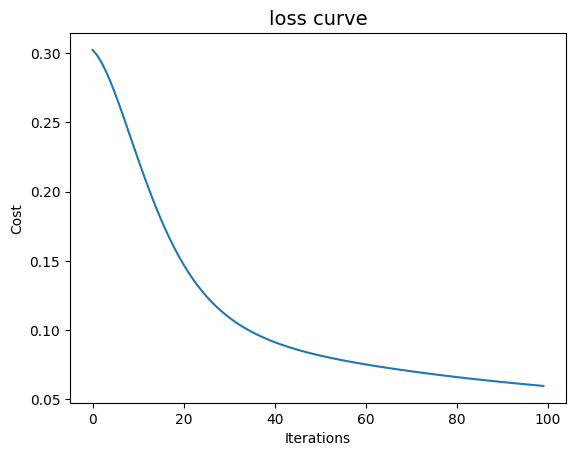

In [ ]:
plt.plot(mlpregressor.loss_curve_)
plt.title("loss curve",fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
y_pred_sk=mlpregressor.predict(x_test)
print(y_pred_sk)

[ 0.64095158  0.61074605 -0.25903211 -0.23915816  1.44823911  0.52230231
 -1.79090662 -0.73989172 -1.6702257  -1.91750819]


In [ ]:
y_pred_sk=np.array(y_pred_sk)
y_pred_sk=y_pred_sk.reshape(-1,1)
print(y_pred_sk.shape)
y_pred_sk_rescalled=sc.inverse_transform(y_pred_sk)
print(y_pred_sk_rescalled)

(10, 1)
[[137587.30111252]
 [136382.06787995]
 [101676.97747047]
 [102469.9695529 ]
 [169798.94799448]
 [132853.06676731]
 [ 40553.52570604]
 [ 82490.15837902]
 [ 45368.82528492]
 [ 35501.98610564]]


In [ ]:
comp=pd.DataFrame(np.c_[y_test_rescalled,y_pred_sk_rescalled],columns=["Original Profit","Predicted Profit"])
print(comp)

   Original Profit  Predicted Profit
0        134307.35     137587.301113
1        141585.52     136382.067880
2        101004.64     101676.977470
3         96712.80     102469.969553
4        191792.06     169798.947994
5        146121.95     132853.066767
6         14681.40      40553.525706
7         97427.84      82490.158379
8         69758.98      45368.825285
9         64926.08      35501.986106


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
print("MAE:",mean_absolute_error(y_test_rescalled,y_pred_sk_rescalled))
print("MSE:",np.sqrt(mean_squared_error(y_test_rescalled,y_pred_sk_rescalled)))

MAE: 14479.896143060614
MSE: 17562.316018737667
